## Dollar Cost Averaging (DCA) vs Value Averaging (VA) Investing

The idea behind this analysis is to compare the results & strengths and weaknesses of two popular investing methods - Dollar Cost Averaging and Value Averaging. To do that I will use simple yet powerful set of analytical tools - Python programming language with Pandas module to manipulate the data and Matplotlib module to visualize it. 

Before I start with the analysis let me first briefly explain both of the concepts by quoting investopedia and displaying table examples:

**[Dollar Costs Averaging](https://www.investopedia.com/terms/d/dollarcostaveraging.asp)** - 
 "is an investment technique of buying a fixed dollar amount of a particular investment on a regular schedule, regardless of the share price. The investor purchases more shares when prices are low and fewer shares when prices are high."
 
 An example of **3 period DCA with contribution of \$1000 per period**
 ![title](DCA_table.jpg)
 
 **[Value Averaging](https://www.investopedia.com/terms/v/value_averaging.asp)** - 
 "An investing strategy that works like dollar cost averaging (DCA) in terms of steady monthly contributions, but differs in its approach to the amount of each monthly contribution. In value averaging, the investor sets a target growth rate or amount on his or her asset base or portfolio each month, and then adjusts the next month's contribution according to the relative gain or shortfall made on the original asset base."
 
  An example of **3 period VA with target value of \+$1000 per period**
 ![title](VA_table.jpg)
 

### Analysis Assumptions:
* 5 years or 20 quarters worth of data
* 3 case studies (uptrend, downtrend and horizontal) to examine results in each of the market conditions
* Investment starts on last day of 1Q 2012 with \$10,000 initial contribution 
* Following the initial investment contributions of \$2,500 are made quarterly on last quarter day for DCA and similarly target value increases by $2,500 on a quarter basis for VA
* To keep it simple I ignore transaction fees and commissions

In [1]:
initial_inv = -10000
quarterly_contribution = -2500

### Xirr to find outperforming strategy:
XIRR is a function for calculatation of internal rate of return (annualized return) for cash flows occurring at irregular intervals. Xirr is commonly used in spreadsheets to analyse investment performance across times series. Sadly no major python data analysis module (numpy, pandas etc.) has xirr function  included. Luckly github user **peliot created module with python implementations of Microsoft Excel's XNPV and XIRR functions**. You can find it [here](https://github.com/peliot/XIRR-and-XNPV) and while visiting peliot's git don't forget to give him a well deserved star!


 In this study negative cash flows (investments) are occuring on a quarterly basis while positive cash flow (divestment) occurs on the last day of 4Q 2017.

### Importing modules and setting visualisation options:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import financial
from matplotlib import style
pd.set_option('display.float_format', lambda x: '%.2f' % x)
style.use('ggplot')
% matplotlib inline

# Study 1: Bull Market (S&P 500)

### Stock performance visualisation 

In [3]:
def quotes_df(ticker, start, end):
    '''
    Downloads quotes in csv and loads into pandas DataFrame
    ticker - 'APPL'
    start - 'YYYYMMDD'
    end - 'YYYYMMDD"
    '''
    url = "".join(("https://stooq.pl/q/d/l/?s=", ticker, "&d1=", start, "&d2=", end, "&i=d"))
    df = pd.read_csv(url)
    df = df[['Data','Zamkniecie']]
    df['Data'] = pd.to_datetime(df["Data"], format='%Y-%m-%d')
    df.set_index('Data', inplace=True)
    df.rename(columns={'Zamkniecie':'Price'}, inplace=True)
    return df

In [4]:
bull_df = quotes_df('^SPX', '20120101', '20180101')

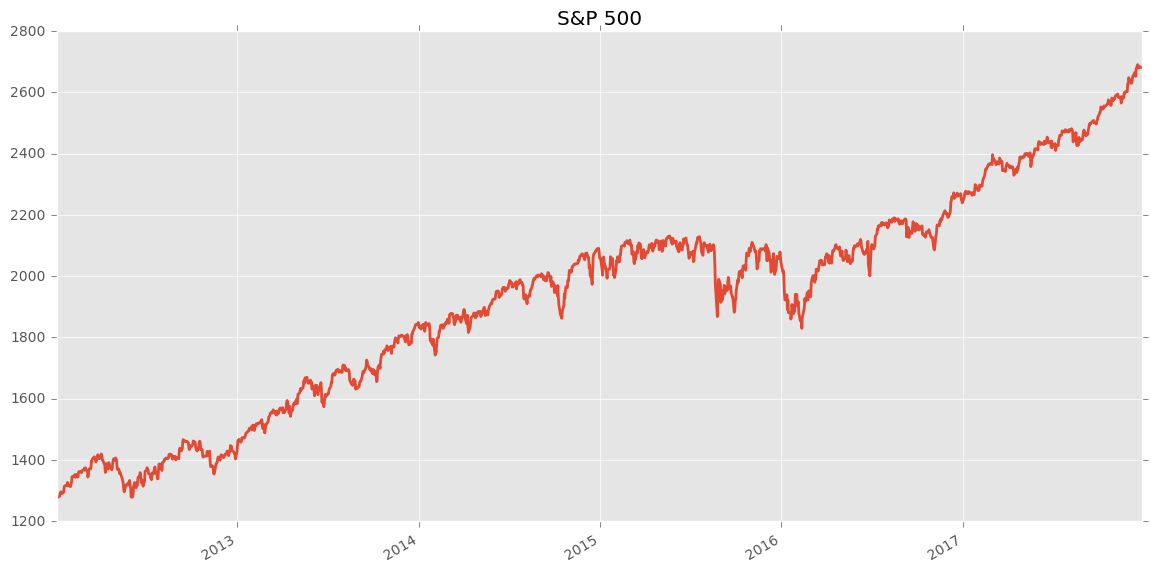

In [5]:
ax = bull_df.plot(figsize=(14,7), linewidth=2, legend=False, title = 'S&P 500')
plt.xlabel('');

### Dollar Cost Averaging DataFrame:

In [6]:
def dca_df_creator(df, **quess_val):
    dca_df = df.asfreq(freq='Q',method='ffill')
    dca_df['DCA_contr'] = initial_inv
    dca_df.iloc[1:,1] = quarterly_contribution
    dca_df['DCA_cum_inv'] = dca_df['DCA_contr'].cumsum()
    dca_df['DCA_shares_bought'] = -dca_df['DCA_contr']/dca_df.iloc[:,0]
    dca_df['DCA_cum_shares'] = dca_df['DCA_shares_bought'].cumsum()
    dca_df['DCA_Total_Val'] = dca_df['DCA_cum_shares'] * dca_df.iloc[:,0]
    dca_df['DCA_avg_price'] = -dca_df['DCA_cum_inv'] / dca_df['DCA_cum_shares']
    dca_df['DCA_P&L'] = dca_df['DCA_Total_Val'] + dca_df['DCA_cum_inv']
    values = list(dca_df['DCA_contr'])
    values.append(dca_df['DCA_Total_Val'][-1])
    dates = list(dca_df.index)
    dates.append(dca_df.index[-1])
    feed = []
    for date, val in zip(dates, values):
        feed.append((date, val))
    dca_xirr = financial.xirr(tuple(feed), guess=quess_val.get('guess_val',0.1))
    return dca_df, dca_xirr

In [7]:
bull_dca, bull_dca_xirr = dca_df_creator(bull_df)
bull_dca

,Price,DCA_contr,DCA_cum_inv,DCA_shares_bought,DCA_cum_shares,DCA_Total_Val,DCA_avg_price,DCA_P&L
Data,,,,,,,,
2012-03-31,1408.47,-10000,-10000,7.10,7.10,10000.00,1408.47,0.00
2012-06-30,1362.16,-2500,-12500,1.84,8.94,12171.20,1398.96,-328.80
2012-09-30,1440.67,-2500,-15000,1.74,10.67,15372.71,1405.74,372.71
2012-12-31,1426.19,-2500,-17500,1.75,12.42,17718.20,1408.63,218.20
2013-03-31,1569.19,-2500,-20000,1.59,14.02,21994.75,1426.88,1994.75
2013-06-30,1606.28,-2500,-22500,1.56,15.57,25014.63,1444.81,2514.63
2013-09-30,1681.55,-2500,-25000,1.49,17.06,28686.81,1465.44,3686.81
2013-12-31,1848.36,-2500,-27500,1.35,18.41,34032.55,1493.57,6532.55
2014-03-31,1872.34,-2500,-30000,1.34,19.75,36974.07,1519.18,6974.07


### Value Averaging DataFrame

In [8]:
def va_df_creator(df, **quess_val):   
    va_df = df.asfreq(freq='Q',method='ffill')
    va_df['VA_target'] = initial_inv
    va_df.iloc[1:,1] = quarterly_contribution
    va_df['VA_target_cum'] = va_df['VA_target'].cumsum()
    va_df['VA_target_shares'] = -va_df['VA_target']/va_df.iloc[:,0]
    va_df.loc[va_df.index[0],'VA_contr'] = initial_inv
    va_df.loc[va_df.index[0],'VA_shares_bought'] = -initial_inv/va_df.iloc[:,0][0]
    va_df.loc[va_df.index[0],'VA_cum_shares'] = va_df['VA_shares_bought'][0]
    n = 0
    for i, row in va_df.iterrows():
        cur_target = va_df['VA_target_cum'][i]
        prev_cum = va_df['VA_cum_shares'][n-1]
        cur_price = va_df.iloc[:,0][i]
        n += 1
        if i == va_df.index[0]:
            continue
        else:
            cur_cont = cur_target + (prev_cum * cur_price)
            cur_shares = -cur_cont / cur_price
            va_df.loc[i,'VA_contr'] = cur_cont
            va_df.loc[i, 'VA_shares_bought'] = cur_shares
            va_df.loc[i, 'VA_cum_shares'] = prev_cum + cur_shares
    va_df['VA_cum_inv'] = va_df['VA_contr'].cumsum()
    va_df['VA_Total_Val'] = va_df['VA_cum_shares'] * va_df.iloc[:,0]
    va_df['VA_avg_price'] = -va_df['VA_cum_inv'] / va_df['VA_cum_shares']
    va_df['VA_P&L'] = va_df['VA_Total_Val'] + va_df['VA_cum_inv']
    values = list(va_df['VA_contr'])
    values.append(va_df['VA_Total_Val'][-1])
    dates = list(va_df.index)
    dates.append(va_df.index[-1])
    feed = []
    for date, val in zip(dates, values):
        feed.append((date, val))
    va_xirr = financial.xirr(tuple(feed), guess=quess_val.get('guess_val',0.1))
    va_df = va_df[['Price', 'VA_contr', 'VA_cum_inv', 'VA_shares_bought','VA_cum_shares',
                   'VA_Total_Val', 'VA_avg_price', 'VA_P&L']]
    return va_df, va_xirr

In [9]:
bull_va, bull_va_xirr = va_df_creator(bull_df)
bull_va

,Price,VA_contr,VA_cum_inv,VA_shares_bought,VA_cum_shares,VA_Total_Val,VA_avg_price,VA_P&L
Data,,,,,,,,
2012-03-31,1408.47,-10000.00,-10000.00,7.10,7.10,10000.00,1408.47,0.00
2012-06-30,1362.16,-2828.80,-12828.80,2.08,9.18,12500.00,1397.99,-328.80
2012-09-30,1440.67,-1779.54,-14608.34,1.24,10.41,15000.00,1403.05,391.66
2012-12-31,1426.19,-2650.76,-17259.10,1.86,12.27,17500.00,1406.56,240.90
2013-03-31,1569.19,-745.32,-18004.43,0.47,12.75,20000.00,1412.62,1995.57
2013-06-30,1606.28,-2027.27,-20031.70,1.26,14.01,22500.00,1430.07,2468.30
2013-09-30,1681.55,-1445.65,-21477.36,0.86,14.87,25000.00,1444.61,3522.64
2013-12-31,1848.36,-20.00,-21497.35,0.01,14.88,27500.00,1444.90,6002.65
2014-03-31,1872.34,-2143.22,-23640.58,1.14,16.02,30000.00,1475.44,6359.42


### Bull market results comparison

In [10]:
def comparison_graphs(df_dca, df_va):
    return_df = pd.concat([df_dca[['DCA_cum_inv','DCA_P&L']], df_va[['VA_cum_inv','VA_P&L']]], axis=1)
    return_df['DCA_return'] = return_df['DCA_P&L'] / -return_df['DCA_cum_inv']*100
    return_df['VA_return'] = return_df['VA_P&L'] / -return_df['VA_cum_inv']*100
    return_df['diff'] = return_df['VA_return'] - return_df['DCA_return']

    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))
    ax1.plot(return_df.index, return_df['VA_return'], linewidth=3, label='Value Averaging', color='b')
    ax1.plot(return_df.index, return_df['DCA_return'], linewidth=3, label='Dollar Cost Averaging', color='r')
    ax1.legend(loc='best')
    ax1.set_title('DCA and VA investment returns (%)')
    ax1.set_ylabel('Investment return (%)')
    ax2.fill_between(return_df.index, y1=return_df['diff'], y2=0, color='b', where=return_df['diff']>0)
    ax2.fill_between(return_df.index, y1=return_df['diff'], y2=0, color='r', where=return_df['diff']<0)
    ax2.set_ylabel('Difference in return pp')
    ax2.set_title('Difference (Value Averaging return % - Dollar Cost Average return % )')
    ax2.legend(["Value Averaging outperformance", "Dollar Cost Averaging outperformance"], loc='upper left');
    return return_df.tail()

,DCA_cum_inv,DCA_P&L,VA_cum_inv,VA_P&L,DCA_return,VA_return,diff
Data,,,,,,,
2016-09-30,-55000,14402.98,-42414.48,12585.52,26.19,29.67,3.49
2016-12-31,-57500,16661.50,-43124.66,14375.34,28.98,33.33,4.36
2017-03-31,-60000,20765.37,-42442.79,17557.21,34.61,41.37,6.76
2017-06-30,-62500,22839.95,-43401.60,19098.40,36.54,44.00,7.46
2017-09-30,-65000,26218.81,-43427.04,21572.96,40.34,49.68,9.34


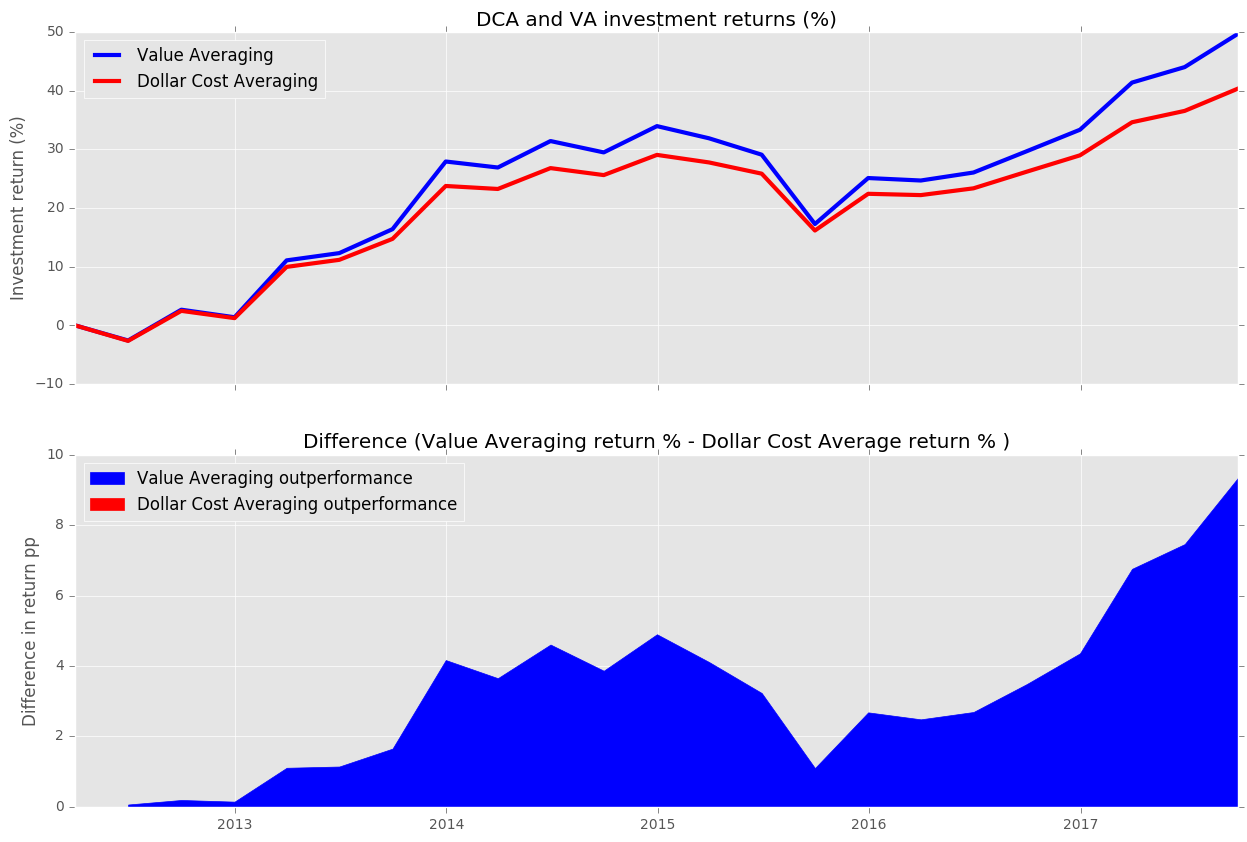

In [27]:
bull_summary = comparison_graphs(bull_dca, bull_va)
bull_summary

In [55]:
def summary_table(df_dca, df_va, xirr_dca, xirr_va, dca_col, va_col):
    summary = [['Final Value', df_dca['DCA_Total_Val'][-1], df_va['VA_Total_Val'][-1]],
          ['Total Invested', -df_dca['DCA_cum_inv'][-1], -df_va['VA_cum_inv'][-1]],
          ['Profit / Loss', df_dca['DCA_P&L'][-1], df_va['VA_P&L'][-1]],
          ['Avg share price', df_dca['DCA_avg_price'][-1], df_va['VA_avg_price'][-1]],
          ['XIRR', xirr_dca*100, xirr_va*100]]

    bull_summary = pd.DataFrame(summary, columns=['Measure', dca_col, va_col])
    bull_summary = bull_summary.set_index('Measure')
    bull_summary['DCA - VA'] = bull_summary[dca_col] - bull_summary[va_col]
    return bull_summary

In [67]:
bull_table = summary_table(bull_dca, bull_va, bull_dca_xirr, bull_va_xirr, 'DCA_bull', 'VA_bull')
bull_table

,DCA_bull,VA_bull,DCA - VA
Measure,,,
Final Value,91218.81,65000.00,26218.81
Total Invested,65000.00,43427.04,21572.96
Profit / Loss,26218.81,21572.96,4645.85
Avg share price,1795.23,1683.21,112.02
XIRR,11.04,11.29,-0.25


### Bull market delivered solid results for both methods.
<br>**Dollar Cost Averaging** saw xirr of **11.0%** while **Value Averaging 11.3%.**

* **DCA's total investment of \$65,000**  (which was known in advance) **returned final value of \~$91,200.**
* **VA's final value of \$65,000** (which was known in advance) was achieved with **total investment of ~\$43,400.**

<br> Although VA's percentage return was higher than DCA's it's the latter that produced almost \$5k more profit in nominal value - but required \$~21.6k of additional contribution


# Study 2: Bear Market (Deutsche Bank)

### Stock performance visualisation 

In [14]:
bear_df = quotes_df('DB.US', '20120101', '20180101')

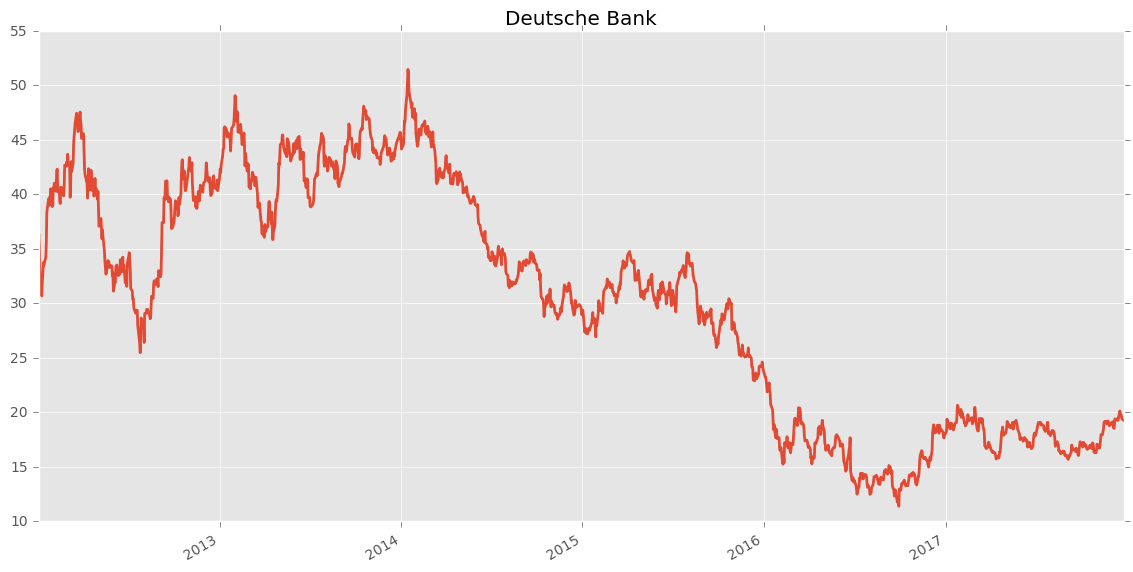

In [15]:
ax = bear_df.plot(figsize=(14,7), linewidth=2, legend=False, title = 'Deutsche Bank')
plt.xlabel('');

### Dollar Cost Averaging DataFrame:

In [16]:
bear_dca, bear_dca_xirr = dca_df_creator(bear_df, guess_val=-0.5)
bear_dca

,Price,DCA_contr,DCA_cum_inv,DCA_shares_bought,DCA_cum_shares,DCA_Total_Val,DCA_avg_price,DCA_P&L
Data,,,,,,,,
2012-03-31,45.39,-10000,-10000,220.30,220.30,10000.00,45.39,0.00
2012-06-30,33.68,-2500,-12500,74.23,294.53,9919.43,42.44,-2580.57
2012-09-30,36.92,-2500,-15000,67.72,362.24,13373.70,41.41,-1626.30
2012-12-31,41.24,-2500,-17500,60.62,422.87,17438.96,41.38,-61.04
2013-03-31,36.42,-2500,-20000,68.63,491.50,17902.86,40.69,-2097.14
2013-06-30,39.70,-2500,-22500,62.97,554.47,22012.03,40.58,-487.97
2013-09-30,43.42,-2500,-25000,57.58,612.05,26573.56,40.85,1573.56
2013-12-31,45.65,-2500,-27500,54.76,666.82,30440.89,41.24,2940.89
2014-03-31,42.42,-2500,-30000,58.93,725.75,30789.07,41.34,789.07


### Value Averaging DataFrame

In [17]:
bear_va, bear_va_xirr = va_df_creator(bear_df, guess_val=-0.5)
bear_va

,Price,VA_contr,VA_cum_inv,VA_shares_bought,VA_cum_shares,VA_Total_Val,VA_avg_price,VA_P&L
Data,,,,,,,,
2012-03-31,45.39,-10000.00,-10000.00,220.30,220.30,10000.00,45.39,0.00
2012-06-30,33.68,-5080.57,-15080.57,150.85,371.15,12500.00,40.63,-2580.57
2012-09-30,36.92,-1297.47,-16378.04,35.14,406.29,15000.00,40.31,-1378.04
2012-12-31,41.24,-744.40,-17122.44,18.05,424.35,17500.00,40.35,377.56
2013-03-31,36.42,-4543.22,-21665.67,124.73,549.07,20000.00,39.46,-1665.67
2013-06-30,39.70,-702.33,-22368.00,17.69,566.76,22500.00,39.47,132.00
2013-09-30,43.42,-392.77,-22760.77,9.05,575.81,25000.00,39.53,2239.23
2013-12-31,45.65,-1213.64,-23974.41,26.59,602.40,27500.00,39.80,3525.59
2014-03-31,42.42,-4443.93,-28418.34,104.75,707.15,30000.00,40.19,1581.66


### Bear market results comparison

,DCA_cum_inv,DCA_P&L,VA_cum_inv,VA_P&L,DCA_return,VA_return,diff
Data,,,,,,,
2016-09-30,-55000,-31128.33,-98361.50,-43361.50,-56.60,-44.08,12.51
2016-12-31,-57500,-21991.88,-79811.22,-22311.22,-38.25,-27.95,10.29
2017-03-31,-60000,-23836.20,-85297.82,-25297.82,-39.73,-29.66,10.07
2017-06-30,-62500,-22099.91,-84917.11,-22417.11,-35.36,-26.40,8.96
2017-09-30,-65000,-23258.09,-89208.85,-24208.85,-35.78,-27.14,8.64


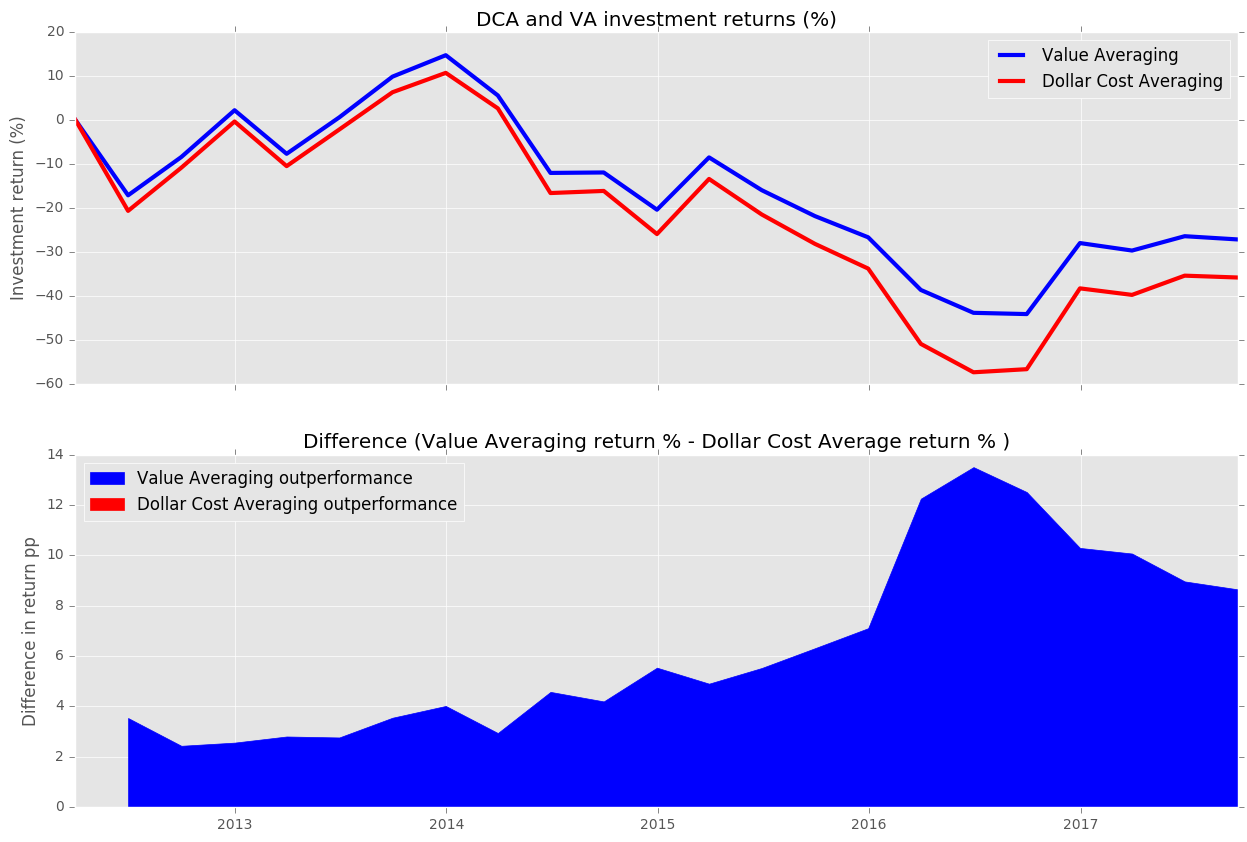

In [18]:
comparison_graphs(bear_dca, bear_va)

In [68]:
bear_table = summary_table(bear_dca, bear_va, bear_dca_xirr, bear_va_xirr, 'DCA_bear', 'VA_bear')
bear_table

,DCA_bear,VA_bear,DCA - VA
Measure,,,
Final Value,41741.91,65000.00,-23258.09
Total Invested,65000.00,89208.85,-24208.85
Profit / Loss,-23258.09,-24208.85,950.76
Avg share price,26.91,23.72,3.19
XIRR,-14.55,-10.70,-3.85


# Study 3: Horizontal trend (Randgold Resources)

### Stock performance visualisation 

In [20]:
consol_df = quotes_df('GOLD.US', '20120101', '20180101')

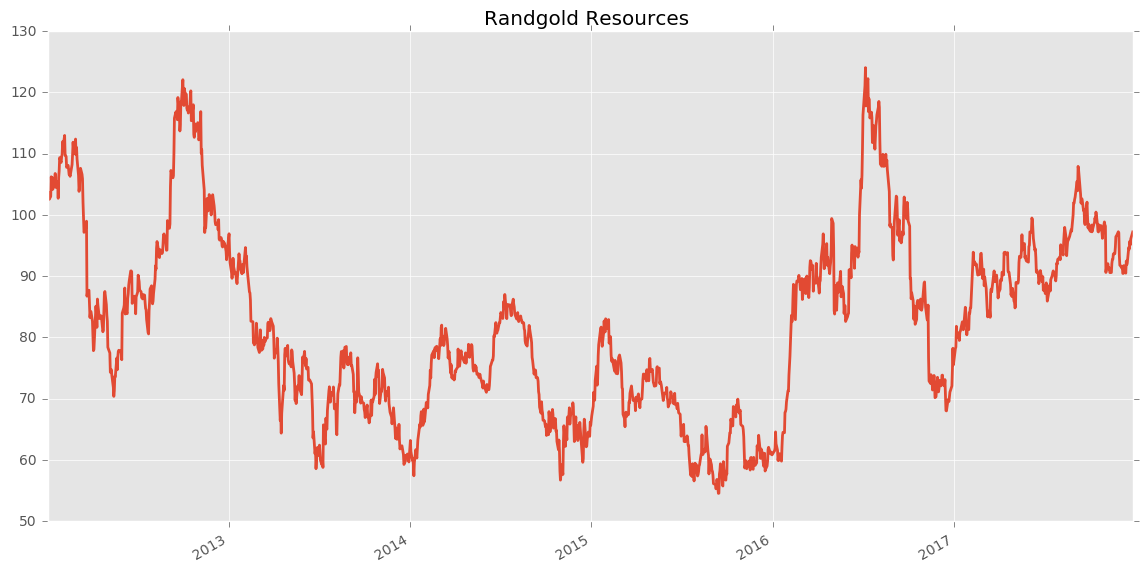

In [21]:
ax = consol_df.plot(figsize=(14,7), linewidth=2, legend=False, title = 'Randgold Resources ')
plt.xlabel('');

### Dollar Cost Averaging DataFrame:

In [22]:
consol_dca, consol_dca_xirr = dca_df_creator(consol_df, guess_val=-0.5)
consol_dca

,Price,DCA_contr,DCA_cum_inv,DCA_shares_bought,DCA_cum_shares,DCA_Total_Val,DCA_avg_price,DCA_P&L
Data,,,,,,,,
2012-03-31,84.20,-10000,-10000,118.77,118.77,10000.00,84.20,0.00
2012-06-30,86.59,-2500,-12500,28.87,147.64,12783.61,84.67,283.61
2012-09-30,118.32,-2500,-15000,21.13,168.77,19968.64,88.88,4968.64
2012-12-31,95.44,-2500,-17500,26.20,194.96,18606.89,89.76,1106.89
2013-03-31,82.71,-2500,-20000,30.23,225.19,18625.20,88.81,-1374.80
2013-06-30,61.95,-2500,-22500,40.36,265.55,16449.82,84.73,-6050.18
2013-09-30,69.24,-2500,-25000,36.11,301.66,20885.39,82.88,-4114.61
2013-12-31,60.80,-2500,-27500,41.12,342.78,20839.12,80.23,-6660.88
2014-03-31,73.02,-2500,-30000,34.24,377.01,27530.94,79.57,-2469.06


### Value Averaging DataFrame

In [23]:
consol_va, consol_va_xirr = va_df_creator(consol_df, guess_val=-0.5)
consol_va

,Price,VA_contr,VA_cum_inv,VA_shares_bought,VA_cum_shares,VA_Total_Val,VA_avg_price,VA_P&L
Data,,,,,,,,
2012-03-31,84.20,-10000.00,-10000.00,118.77,118.77,10000.00,84.20,0.00
2012-06-30,86.59,-2216.39,-12216.39,25.60,144.36,12500.00,84.62,283.61
2012-09-30,118.32,2081.09,-10135.30,-17.59,126.77,15000.00,79.95,4864.70
2012-12-31,95.44,-5400.86,-15536.16,56.59,183.37,17500.00,84.73,1963.84
2013-03-31,82.71,-4834.05,-20370.22,58.45,241.81,20000.00,84.24,-370.22
2013-06-30,61.95,-7520.49,-27890.71,121.40,363.21,22500.00,76.79,-5390.71
2013-09-30,69.24,147.46,-27743.25,-2.13,361.08,25000.00,76.83,-2743.25
2013-12-31,60.80,-5547.91,-33291.15,91.26,452.34,27500.00,73.60,-5791.15
2014-03-31,73.02,3031.66,-30259.49,-41.52,410.82,30000.00,73.66,-259.49


### Consolidation market results comparison

,DCA_cum_inv,DCA_P&L,VA_cum_inv,VA_P&L,DCA_return,VA_return,diff
Data,,,,,,,
2016-09-30,-55000,16062.65,-32122.60,22877.40,29.20,71.22,42.01
2016-12-31,-57500,-789.05,-47665.22,9834.78,-1.37,20.63,22.01
2017-03-31,-60000,8066.31,-41186.65,18813.35,13.44,45.68,32.23
2017-06-30,-62500,8986.55,-42875.47,19624.53,14.38,45.77,31.39
2017-09-30,-65000,16421.28,-38875.36,26124.64,25.26,67.20,41.94


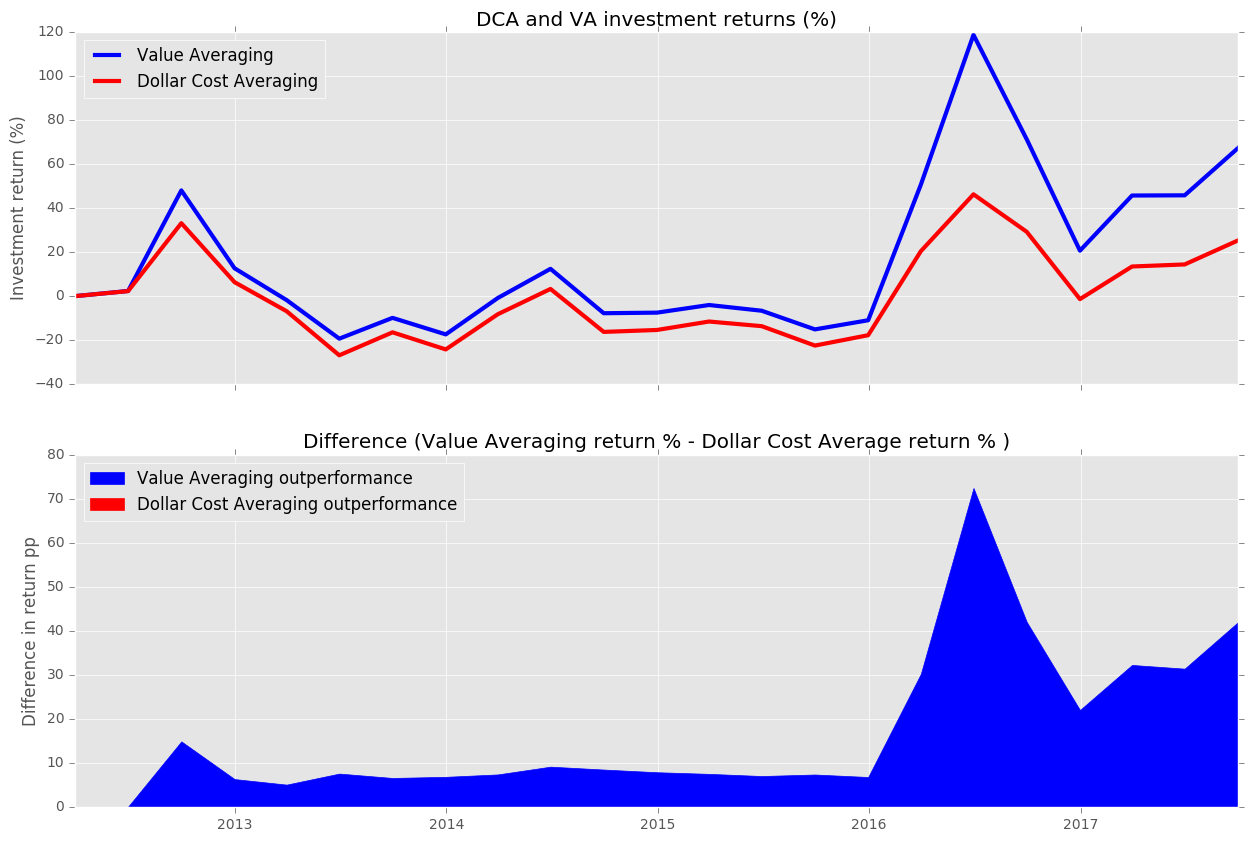

In [30]:
comparison_graphs(consol_dca, consol_va)

In [69]:
horizontal_table = summary_table(consol_dca, consol_va, consol_dca_xirr, consol_va_xirr, 'DCA_horiz', 'VA_horiz')
horizontal_table

,DCA_horiz,VA_horiz,DCA - VA
Measure,,,
Final Value,81421.28,65000.00,16421.28
Total Invested,65000.00,38875.36,26124.64
Profit / Loss,16421.28,26124.64,-9703.36
Avg share price,77.96,58.41,19.55
XIRR,7.33,11.92,-4.58


# Three scenarios summary

In [71]:
final_summary = pd.concat([bull_table.iloc[:,:2], bear_table.iloc[:,:2], horizontal_table.iloc[:,:2]], axis=1)
final_summary

,DCA_bull,VA_bull,DCA_bear,VA_bear,DCA_horiz,VA_horiz
Measure,,,,,,
Final Value,91218.81,65000.00,41741.91,65000.00,81421.28,65000.00
Total Invested,65000.00,43427.04,65000.00,89208.85,65000.00,38875.36
Profit / Loss,26218.81,21572.96,-23258.09,-24208.85,16421.28,26124.64
Avg share price,1795.23,1683.21,26.91,23.72,77.96,58.41
XIRR,11.04,11.29,-14.55,-10.70,7.33,11.92
